In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


#### Titanic Data Description

Ref./Source: https://www.kaggle.com/c/titanic/data

***Passenger ID*** to identify the passenger, numerical feature (Passenger ID/Ticket Number).

***Survived*** is our label, as we can see is a binary feature, 1 if survived and 0 otherwise.

***Pclass*** is the Ticket class (1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (lower))

***Name *** is the name of the passenger

***Sex*** is the gender of the passenger

***Age*** is the age in years

***Sibsp*** is the number of siblings / spouses aboard the Titanic

***Parch*** is the number of parents / children aboard the Titanic

***Ticket*** is the ticket number

***Fare*** is the Passenger fare

***Cabin*** is the cabin number

***Embarked*** means Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

In [52]:
# for each column, display column name & its distinct contents ONLY in case the column has less than 6 unique values
def get_columns_and_distinct_values(df,nunique_target=5):
  str_=""
  ret=[]
  for column in df:
      columnSeriesObj = df[column]
      nunique_this_clmn = columnSeriesObj.nunique()
      str_ = 'Column Name: ' + column + ', Column Type: ' + str(df[column].dtype)
      if nunique_this_clmn == 1:
          str_ = str_ + ', Column has one unique value only and can be dropped from the dataframe'
          ret.append(str_)
          ret.append("------------------------------------------------------------")
      elif nunique_this_clmn <= nunique_target:
        str_ = str_ + ', Column has ' + str(columnSeriesObj.nunique()) + ' unique value(s) : '
        for val in columnSeriesObj.unique():
          str_ = str_  + str(val) + ","
        str_ = str_[:len(str_)-1]
        ret.append(str_)
        ret.append("------------------------------------------------------------")
      else:
        str_ = str_ + ', Column has more than ' + str(nunique_target) + ' unique values'
      #ret.append(str_)
      #ret.append("==========================================================================")

  print("==========================================================================")
  columns_of_type_object = df.select_dtypes(include=['object']).columns
  print("*** Columns of type object are:", columns_of_type_object)
  print("==========================================================================")
  columns_of_a_single_unique_value = df.columns[df.nunique() == 1]
  print("*** Columns of a single unique value are:", columns_of_a_single_unique_value, " can be dropped")
  print("==========================================================================")
  return ret

In [53]:
# load train data from train.csv
titanic_train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
titanic_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
titanic_train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [61]:
titanic_train_df.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

In [66]:
# check for NULL values
null_values = titanic_train_df.isnull().any().sum()
if null_values > 0:
    print("There are:" , null_values, "Columns that have at least one missing (null) value in the train data.")
else:
    print("Train data is good - There is not any column with any missing (null) value in the train data.")

There are: 3 Columns that have at least one missing (null) value in the train data.


In [67]:
null_counts = titanic_train_df.isnull().sum()
print(null_counts)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [68]:
print ("titanic_train_df:")
print("duplicated records", titanic_train_df.duplicated().sum())

titanic_train_df:
duplicated records 107


#### Embarked Feature / Two Records with Nan values - replace the 2 NULL values in embarked with S = Southampton (as most passengers on Titanic embarked from this port)

In [69]:
# Two records in titanic_train_df with Nan in Embarked feature  - will be dropped from the dataframe
titanic_train_df[titanic_train_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


In [72]:
# Two records in titanic_train_df with Nan in Embarked feature
titanic_train_df[titanic_train_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [73]:
print(titanic_train_df['Embarked'].value_counts())
# most passengers are emabrked from S = Southampton (Three ports of Embarkation C = Cherbourg; Q = Queenstown; S = Southampton)

# replace the 2 NULL values in embarked with S = Southampton (as most passengers on Titanic embarked from this port)
titanic_train_df.loc[titanic_train_df['Embarked'].isnull(),'Embarked'] = 'S'

print(titanic_train_df['Embarked'].value_counts())

titanic_train_df[titanic_train_df['Embarked'].isnull()]

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


#### Cabin Feature / replace missing values in titanic_train_df['Cabin'] with letter 'U' for unknown

In [74]:
print("null values in the Cabin Feature:\n", titanic_train_df.isnull().sum()['Cabin'], "Records")

null values in the Cabin Feature:
 687 Records


In [75]:
titanic_train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [76]:
# keep first letter only in the Cabin
titanic_train_df['Cabin'] = titanic_train_df['Cabin'].str[0]
titanic_train_df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [77]:
# replace missing values in titanic_train_df['Cabin'] with letter 'U' for unknown
titanic_train_df['Cabin'].fillna('U', inplace=True)

In [78]:
titanic_train_df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [79]:
print("null values in the Age Feature:\n", titanic_train_df.isnull().sum()['Age'], "Records")

null values in the Age Feature:
 177 Records


In [49]:
# Fill missing/Nan values in Age with average age
titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)  # 29.642093
print("null values in the Age Feature:\n", titanic_train_df.isnull().sum()['Age'], "Records")
#titanic_train_df['Age'].unique()


null values in the Age Feature:
 0 Records


In [80]:
# Check again after fixing missing records
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [81]:
titanic_train_df.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,9,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,U,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,687,646
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [82]:
titanic_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


In [85]:
null_counts = titanic_train_df.isnull().sum()
print(null_counts)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64


In [83]:
ret=get_columns_and_distinct_values(titanic_train_df,10)
for str_ in ret:
  print(str_)

*** Columns of type object are: Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
*** Columns of a single unique value are: Index([], dtype='object')  can be dropped
Column Name: Survived, Column Type: int64, Column has 2 unique value(s) : 0,1
------------------------------------------------------------
Column Name: Pclass, Column Type: int64, Column has 3 unique value(s) : 3,1,2
------------------------------------------------------------
Column Name: Sex, Column Type: object, Column has 2 unique value(s) : male,female
------------------------------------------------------------
Column Name: SibSp, Column Type: int64, Column has 7 unique value(s) : 1,0,3,4,2,5,8
------------------------------------------------------------
Column Name: Parch, Column Type: int64, Column has 7 unique value(s) : 0,1,2,5,3,4,6
------------------------------------------------------------
Column Name: Cabin, Column Type: object, Column has 9 unique value(s) : U,C,E,G,D,A,B,F,T
-----------------------------

### Check distribution of cabins among differetn classes

In [121]:
for cbn in titanic_train_df['Cabin'].unique():
    print("Cabin:", cbn)
    #print("Pclass:", cls)
    for cls in titanic_train_df['Pclass'].unique():
        print("\tPclass:", cls, 
              titanic_train_df.loc[(titanic_train_df['Pclass']==cls) & (titanic_train_df['Cabin']==cbn),'Cabin'].count())
    

Cabin: U
	Pclass: 3 479
	Pclass: 1 40
	Pclass: 2 168
Cabin: C
	Pclass: 3 0
	Pclass: 1 59
	Pclass: 2 0
Cabin: E
	Pclass: 3 3
	Pclass: 1 25
	Pclass: 2 4
Cabin: G
	Pclass: 3 4
	Pclass: 1 0
	Pclass: 2 0
Cabin: D
	Pclass: 3 0
	Pclass: 1 29
	Pclass: 2 4
Cabin: A
	Pclass: 3 0
	Pclass: 1 16
	Pclass: 2 0
Cabin: B
	Pclass: 3 0
	Pclass: 1 47
	Pclass: 2 0
Cabin: F
	Pclass: 3 5
	Pclass: 1 0
	Pclass: 2 8


In [123]:
for cls in titanic_train_df['Pclass'].unique():
    #print("Cabin:", cbn)
    print("Pclass:", cls)
    for cbn in titanic_train_df['Cabin'].unique():
        print("\tCabin:", cbn,
              titanic_train_df.loc[(titanic_train_df['Pclass']==cls) & (titanic_train_df['Cabin']==cbn),'Cabin'].count())
    

Pclass: 3
	Cabin: U 479
	Cabin: C 0
	Cabin: E 3
	Cabin: G 4
	Cabin: D 0
	Cabin: A 0
	Cabin: B 0
	Cabin: F 5
Pclass: 1
	Cabin: U 40
	Cabin: C 59
	Cabin: E 25
	Cabin: G 0
	Cabin: D 29
	Cabin: A 16
	Cabin: B 47
	Cabin: F 0
Pclass: 2
	Cabin: U 168
	Cabin: C 0
	Cabin: E 4
	Cabin: G 0
	Cabin: D 4
	Cabin: A 0
	Cabin: B 0
	Cabin: F 8


#### Use data for Fare & Cabin to provide better/more accurate values for the "U = Unknown" cabins for some/many records

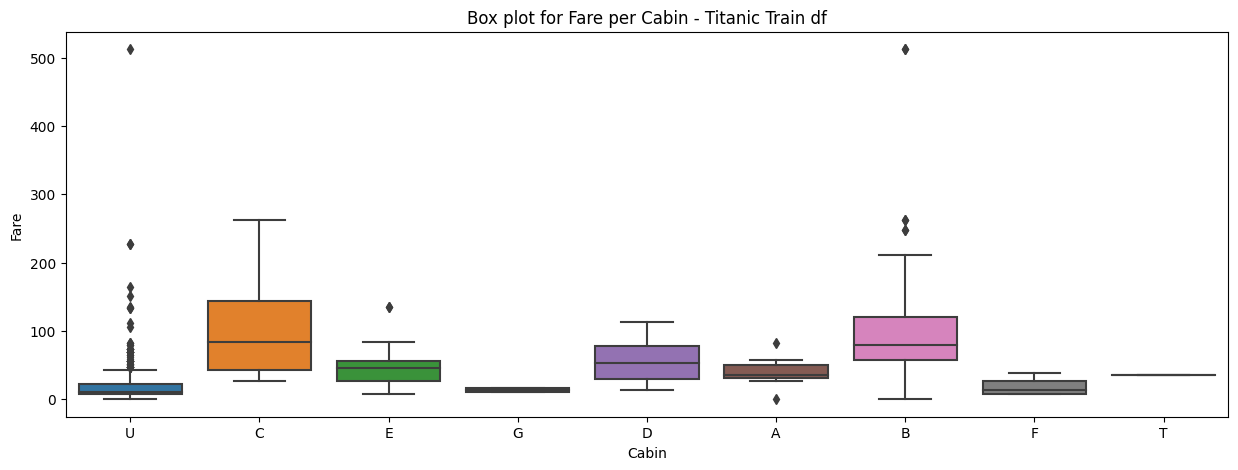

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot using box plot to check for outliers of Fare for the Unknown Cabins (Train df)
plt.figure(figsize=(15,5))
plt.title("Box plot for Fare per Cabin - Titanic Train df")
sns.boxplot(x='Cabin', y='Fare',data=titanic_train_df)
plt.show()

In [88]:
def cbnFareDataToDataFrame(titanic_df):
  CntCbnFare, MinCbnFare, MaxCbnFare, AvgCbnFare, MedianCbnFare, ModeCbnFare = [],[],[],[],[],[]
  for cbn in titanic_df['Cabin'].unique(): #'ABCDEFGTU':
    condition = (titanic_df['Cabin'] == cbn) & (titanic_df['Fare']!=0)

    #strCbnFareInfo = "For Cabin: " + cbn

    cnt=titanic_df[condition]['Fare'].count()
    #strCbnFareInfo += " ===> Count=" + str(cnt)
    CntCbnFare.append(cnt)

    min_=round(titanic_df[condition]['Fare'].min(),2)
    #strCbnFareInfo += ", Min Fare=" + str(min)
    MinCbnFare.append(min_)

    max_=round(titanic_df[condition]['Fare'].max(),2)
    #strCbnFareInfo += ", Max=" + str(max_)
    MaxCbnFare.append(max_)

    Mean_=round(titanic_df[condition]['Fare'].mean(),2)
    #strCbnFareInfo += ", Mean=" + str(Mean_)
    AvgCbnFare.append(Mean_)

    Median_=round(titanic_df[condition]['Fare'].median(),2)
    #strCbnFareInfo += ", Median=" + str(Median_)
    MedianCbnFare.append(Median_)

    Mode_=round(titanic_df[condition]['Fare'].mode().mean(),2)
    #strCbnFareInfo += ", Mode=" + str(Mode_)
    ModeCbnFare.append(Mode_)

  #print(strCbnFareInfo)

  dict = {'Cbn': list(titanic_df['Cabin'].unique()), 'Count': CntCbnFare, 'Min': MinCbnFare, 'Max': MaxCbnFare, 'Mean': AvgCbnFare, 'Median': MedianCbnFare, 'Mode': ModeCbnFare}
  cbnFareDf = pd.DataFrame(dict)
  cbnFareDf.head(len(titanic_df['Cabin'].unique()))

  #print(cbnFareDf.sort_values(by=['Median','Mean', 'Mode'], ascending=[True,True, True]))
  return cbnFareDf

In [90]:
# first obsevation (only for titanic train) that there is only one entry for cabin T so high probability
# it is a data-issue - will fix to Cabin A as same Mode & closed Median & Mean
titanic_train_df.loc[titanic_train_df['Cabin'] == 'T', 'Cabin'] = 'A'

cbnFareTrainDf = cbnFareDataToDataFrame(titanic_train_df)
print(cbnFareTrainDf.sort_values(by=['Mean','Median','Mode'], ascending=[False,False, False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
6   B     45   5.00  512.33  118.55   80.00  120.00
1   C     59  26.55  263.00  100.15   83.48  126.52
4   D     33  12.88  113.28   57.24   53.10   80.13
2   E     32   8.05  134.50   46.03   45.18   44.16
5   A     15  26.00   81.86   41.99   35.50   35.50
0   U    675   4.01  512.33   19.50   11.13    8.05
7   F     13   7.65   39.00   18.70   13.00   16.82
3   G      4  10.46   16.70   13.58   13.58   13.58


In [89]:
cbnFareTrainDf = cbnFareDataToDataFrame(titanic_train_df)
#cbnFareDf.head(len('ABCDEFGTU'))
print(cbnFareTrainDf.sort_values(by=['Mean','Median','Mode'], ascending=[False,False, False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
6   B     45   5.00  512.33  118.55   80.00  120.00
1   C     59  26.55  263.00  100.15   83.48  126.52
4   D     33  12.88  113.28   57.24   53.10   80.13
2   E     32   8.05  134.50   46.03   45.18   44.16
5   A     14  26.00   81.86   42.45   37.55   35.50
8   T      1  35.50   35.50   35.50   35.50   35.50
0   U    675   4.01  512.33   19.50   11.13    8.05
7   F     13   7.65   39.00   18.70   13.00   16.82
3   G      4  10.46   16.70   13.58   13.58   13.58
